In [336]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']  # windows用SimHei 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.rcParams.update({'font.size':13 }) 

In [337]:
from pyecharts.globals import CurrentConfig, NotebookType
CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_LAB
from pyecharts import options as opts
from pyecharts.charts import Geo
from pyecharts.charts import Line,Scatter

In [338]:
calendar = pd.read_csv('./data/calendar.csv')
calendar2015 = pd.read_csv('./data/calendar2015.csv')
calendar2016 = pd.read_csv('./data/calendar2016.csv')
calendar2017 = pd.read_csv('./data/calendar2017.csv')
listings = pd.read_csv('./data/listings.csv',low_memory=False)
reviews1 = pd.read_csv('./data/reviews1.csv')
reviews2 = pd.read_csv('./data/reviews2.csv')
sampledreviews = pd.read_csv('./data/sampledreviews.csv')

In [339]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50968 entries, 0 to 50967
Data columns (total 96 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                50968 non-null  int64  
 1   listing_url                       50968 non-null  object 
 2   scrape_id                         50968 non-null  int64  
 3   last_scraped                      50968 non-null  object 
 4   name                              50947 non-null  object 
 5   summary                           49038 non-null  object 
 6   space                             34971 non-null  object 
 7   description                       50500 non-null  object 
 8   experiences_offered               50968 non-null  object 
 9   neighborhood_overview             30258 non-null  object 
 10  notes                             20323 non-null  object 
 11  transit                           31567 non-null  object 
 12  acce

In [340]:
listings.isnull().sum()[listings.isnull().sum()!=0]

name                              21
summary                         1930
space                          15997
description                      468
neighborhood_overview          20710
notes                          30645
transit                        19401
access                         21606
interaction                    22713
house_rules                    20610
thumbnail_url                  50968
medium_url                     50968
xl_picture_url                 50968
host_name                          8
host_since                         8
host_location                    154
host_about                     19916
host_response_time             24503
host_response_rate             24503
host_acceptance_rate           50968
host_is_superhost                  8
host_thumbnail_url                 8
host_picture_url                   8
host_neighbourhood              7152
host_listings_count                8
host_total_listings_count          8
host_has_profile_pic               8
h

In [341]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18603320 entries, 0 to 18603319
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   listing_id  int64 
 1   date        object
 2   available   object
 3   price       object
dtypes: int64(1), object(3)
memory usage: 567.7+ MB


### 数据清洗

In [342]:
#,'latitude':'纬度','longitude':'经度'

### listings_(房屋张贴表)

In [343]:
# 从listings数据集中取出需要进行数据可视化分析的列，存入listings_中
listings_ = listings.loc[:,['id','host_id','host_name','host_since','host_is_superhost','host_listings_count',
                            'neighbourhood_cleansed','neighbourhood_group_cleansed','state','availability_365',
                            'property_type','room_type','bedrooms','bed_type','price',
                            'security_deposit','cleaning_fee','number_of_reviews','review_scores_rating']].copy()

In [344]:
# 重命名listings_的列名，改成对应的中文命名
listings_.rename(columns={'host_id':'房屋ID','host_name':'房屋名称','host_since':'房屋建立时间','host_is_superhost':'是否为大房屋',
                          'host_listings_count':'房屋租赁数量','neighbourhood_cleansed':'地址','neighbourhood_group_cleansed':'地区',
                          'state':'州','availability_365':'可租总天数/年','property_type':'房屋类型','room_type':'房间类型',
                          'bedrooms':'卧室数量','bed_type':'床类型','price':'价格','security_deposit':'保证金',
                          'cleaning_fee':'清理费用','number_of_reviews':'评论数量','review_scores_rating':'评分'},inplace=True)

In [345]:
listings_.sample(5)

,id,房屋ID,房屋名称,房屋建立时间,是否为大房屋,房屋租赁数量,地址,地区,州,可租总天数/年,房屋类型,房间类型,卧室数量,床类型,价格,保证金,清理费用,评论数量,评分
41507,24803604,158601372,Aliza,2017-11-13,f,1.0,Harlem,Manhattan,NY,1,Apartment,Private room,1.0,Real Bed,$75.00,NaN,NaN,11,94.0
3896,1966565,10157636,Joyce,2013-11-20,f,1.0,Downtown Brooklyn,Brooklyn,NY,0,Apartment,Entire home/apt,1.0,Real Bed,$160.00,$185.00,$50.00,0,NaN
44864,26842177,183600304,Dustin,2018-04-10,f,35.0,Little Italy,Manhattan,NY,338,Apartment,Entire home/apt,2.0,Real Bed,$144.00,$0.00,$250.00,0,NaN
43792,26277650,197189245,Ahmet,2018-06-22,f,7.0,Hell's Kitchen,Manhattan,NY,177,Apartment,Shared room,1.0,Real Bed,$85.00,$100.00,$8.00,27,94.0
5988,3613067,3953962,Kettie,2012-10-23,f,3.0,Lower East Side,Manhattan,NY,307,Apartment,Private room,1.0,Real Bed,$100.00,$300.00,$60.00,16,96.0


In [346]:
listings_.isnull().sum()

id             0
房屋ID           0
房屋名称           8
房屋建立时间         8
是否为大房屋         8
房屋租赁数量         8
地址             0
地区             0
州             13
可租总天数/年        0
房屋类型           0
房间类型           0
卧室数量          56
床类型            0
价格             0
保证金        19367
清理费用       12206
评论数量           0
评分         11714
dtype: int64

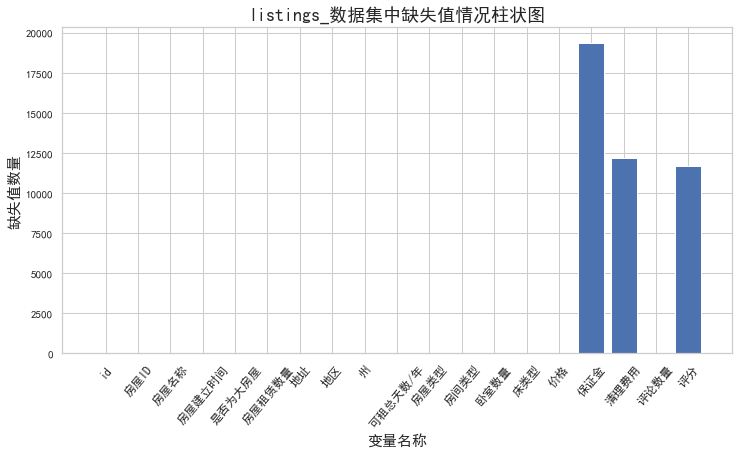

In [347]:
plt.figure(figsize=(12,6))
plt.bar(listings_.columns,listings_.isnull().sum())
plt.xticks(fontsize=12,rotation=50)
plt.ylabel('缺失值数量',fontsize=15)
plt.xlabel('变量名称',fontsize=15)
plt.title('listings_数据集中缺失值情况柱状图',fontsize=18)
plt.show()

### 数据清洗

In [348]:
# 删除房屋位置信息缺少的数据
listings_.dropna(subset=['房屋名称','地区','州'],how='any',inplace=True)

In [349]:
# 对卧室数量缺少的数据填充 0
listings_.卧室数量.fillna(0,inplace=True)

#### 去除多余的占位符

In [350]:
listings_.loc[:,['价格','保证金','清理费用']] = listings_.loc[:,['价格','保证金','清理费用']].replace('\t','')
listings_.loc[:,['价格','保证金','清理费用']] = listings_.loc[:,['价格','保证金','清理费用']].replace('\n','')

#### 将空值替换成'$0.00'

In [351]:
listings_.loc[:,['价格','保证金','清理费用']] = listings_.loc[:,['价格','保证金','清理费用']].replace(np.NaN,'$0.00')

#### 去除美元符号

In [352]:
listings_['价格'] = listings_['价格'].map(lambda x:str(x)[1:])
listings_['保证金'] = listings_['保证金'].map(lambda x:str(x)[1:])
listings_['清理费用'] = listings_['清理费用'].map(lambda x:str(x)[1:])

#### 转换类型

In [353]:
# 去除价格的会计格式，例如'1,000.00',将其转成 1000.00
listings_.loc[:,['价格','保证金','清理费用']] = listings_.loc[:,['价格','保证金','清理费用']].applymap(lambda x:x.replace(',',''))

In [354]:
listings_['价格'] = listings_['价格'].astype('float64')
listings_['保证金'] = listings_['保证金'].astype('float64')
listings_['清理费用'] = listings_['清理费用'].astype('float64')

#### 处理没有评论的数据，将评分设为0分

In [355]:
listings_.评分.fillna(0,inplace=True)

#### 去除空格符

In [356]:
object_lt = listings_.dtypes[listings_.dtypes=='object'].index.to_list()

listings_.loc[:,object_lt] = listings_.loc[:,object_lt].applymap(lambda x:x.replace(' ',''))

#### 对州数据进行清洗汇总
将'NY','ny','NewYork','Ny'替换成'New York'<br />
将'MP'替换成'Northern Mariana Islands'<br />
将'CA'替换成'California'<br />
将'NJ'提换成'New Jersey'

In [357]:
# 清洗前
listings_.州.unique()

array(['NY', 'ny', 'MP', 'NewYork', 'CA', 'NJ', 'Ny'], dtype=object)

In [358]:
# 对州数据进行清洗
for i in range(len(listings_)):
    temp = listings_.iloc[i,8]
    if temp in ['NY','ny','NewYork','Ny']:
        listings_.iloc[i,8] = 'New York'
    if temp == 'CA':
        listings_.iloc[i,8] = 'California'
    if temp == 'NJ':
        listings_.iloc[i,8] = 'New Jersey'
    if temp == 'MP':
        listings_.iloc[i,8] = 'Northern Mariana Islands'
        

In [359]:
# 清洗后
listings_.州.unique()

array(['New York', 'Northern Mariana Islands', 'California', 'New Jersey'],
      dtype=object)

#### 城市数据
纽约五大区：Queens,Brooklyn,Staten Island,Manhattan,The Bronx

In [360]:
listings_.地区.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Bronx', 'StatenIsland'],
      dtype=object)

In [361]:
listings_.地址.unique()

array(['Bedford-Stuyvesant', 'Harlem', 'Kensington', 'Midtown', 'RedHook',
       'Williamsburg', 'ProspectHeights', 'ClintonHill', 'EastHarlem',
       "Hell'sKitchen", 'ParkSlope', 'EastVillage', 'MurrayHill',
       'UpperWestSide', 'FlatironDistrict', 'Chinatown', 'LowerEastSide',
       'SouthSlope', 'WashingtonHeights', 'WestVillage', 'Woodside',
       'FortGreene', 'Chelsea', 'CrownHeights', 'Flatbush',
       'BrooklynHeights', 'Bushwick', 'WindsorTerrace', 'Inwood',
       'Greenpoint', 'CarrollGardens', 'Prospect-LeffertsGardens',
       'LongIslandCity', 'Wakefield', 'Jamaica', 'Gowanus', 'KipsBay',
       'SoHo', 'UpperEastSide', 'BoerumHill', 'Flatlands', 'Highbridge',
       'CobbleHill', 'Flushing', 'NoHo', 'Midwood', 'RooseveltIsland',
       'Sunnyside', 'DUMBO', 'Ridgewood', 'St.George',
       'FinancialDistrict', 'GreenwichVillage', 'MorningsideHeights',
       'LittleItaly', 'EastFlatbush', 'Tompkinsville', 'Gramercy',
       'Astoria', 'ClasonPoint', 'Eastchester

#### 建房年数
采用2020年为基准年，构造建房年数，用于表示房屋建成至2020的年数

In [362]:
listings_['建房年数'] = listings_.房屋建立时间.apply(lambda x:(2020 - eval(x.split('-')[0])))

In [363]:
# 转换类型
listings_.卧室数量 = listings_.卧室数量.astype('int')

In [364]:
listings_.sample(5)

,id,房屋ID,房屋名称,房屋建立时间,是否为大房屋,房屋租赁数量,地址,地区,州,可租总天数/年,房屋类型,房间类型,卧室数量,床类型,价格,保证金,清理费用,评论数量,评分,建房年数
25956,16601801,10075380,Mike,2013-11-17,f,1.0,WestVillage,Manhattan,New York,0,Apartment,Entirehome/apt,1,RealBed,232.0,0.0,40.0,3,100.0,7
21623,13895190,82318366,James,2016-07-07,f,1.0,DUMBO,Brooklyn,New York,0,Loft,Entirehome/apt,1,Couch,500.0,0.0,50.0,0,0.0,4
36917,22212028,162303110,Dita,2017-12-11,f,1.0,WestVillage,Manhattan,New York,338,Apartment,Entirehome/apt,0,RealBed,75.0,0.0,95.0,3,93.0,3
20489,13417267,65672074,Miriam,2016-04-03,f,2.0,SouthSlope,Brooklyn,New York,0,Townhouse,Entirehome/apt,2,RealBed,135.0,250.0,150.0,1,60.0,4
1917,739930,3871267,Raed,2012-10-14,f,1.0,GreenwichVillage,Manhattan,New York,38,Loft,Entirehome/apt,1,RealBed,299.0,500.0,150.0,35,99.0,8


#### 数据清洗后查看数据集listings_的清洗情况

In [365]:
listings_.isnull().sum().sum()

0

### reviews(评论表)

#### 拼接reviews1和reviews2

In [366]:
reviews = pd.concat([reviews1,reviews2],axis=0)
reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2515,198,2008-10-13,2603,Jenny,Stephanie was a wonderful host! Her apartment ...
1,2515,859,2009-03-08,8455,Roland,Such a wonderful place and very close to the m...
2,2515,1083,2009-03-25,9759,Cem,I just got back from a trip to NYC during whic...
3,2515,1107,2009-03-27,9193,Holly,Stephanie's offered all the most important thi...
4,2515,2175,2009-05-09,7048,Alessandra,"Stephanie was really nice, ftiendly and helpfu..."
...,...,...,...,...,...,...
495496,6292029,229000816,2018-01-21,32877224,Andrew,The space is really inspired by/for artists an...
495497,6292029,310490619,2018-08-19,135171825,Barbara,"You will find splendid people, good vibrations..."
495498,24130099,338102424,2018-10-18,49095948,Jerry,Fantastic location at CPS/Columbus Circle. Goo...
495499,710040,2501059,2012-10-03,3377326,Romain & Roxane,"The price was to high for the confort, but Ash..."


### Calendar(预约表)

In [367]:
# # 对于calendar数据集合，去除available为f,即为没有租赁的数据
# calendar.drop(index=calendar[calendar.available=='f'].index,inplace=True)
# calendar2015.drop(index=calendar2015[calendar2015.available=='f'].index,inplace=True)
# calendar2016.drop(index=calendar2016[calendar2016.available=='f'].index,inplace=True)
# calendar2017.drop(index=calendar2017[calendar2017.available=='f'].index,inplace=True)

In [368]:
# 检查各个calendar数据集的情况
display('calendar:',calendar.isnull().sum())
display('calendar2015:',calendar2015.isnull().sum())
display('calendar2016:',calendar2016.isnull().sum())
display('calendar2017:',calendar2017.isnull().sum())

'calendar:'

listing_id           0
date                 0
available            0
price         12487669
dtype: int64

'calendar2015:'

listing_id          0
date                0
available           0
price         4192282
dtype: int64

'calendar2016:'

listing_id          0
date                0
available           0
price         7991082
dtype: int64

'calendar2017:'

listing_id           0
date                 0
available            0
price         10764052
dtype: int64

In [369]:
# 合并数据
calendar_ = pd.concat([calendar2015,calendar2016,calendar2017,calendar],axis=0,ignore_index=True)
calendar_.sample(5)

,listing_id,date,available,price
35311994,14076129,2018-08-23,f,NaN
41145019,20773604,2018-08-06,f,NaN
28079315,2983952,2018-02-16,f,NaN
32459855,9738193,2018-07-07,t,$75.00
29568640,5343821,2017-11-10,t,$200.00


In [370]:
# 备份数据
calendar_df = calendar_.copy()

In [371]:
# 删除无价格的无效数据
calendar_df.dropna(subset='price',inplace=True)

In [372]:
# 转换时间序列
calendar_df.date = pd.to_datetime(calendar_df.date)
calendar_df['year'] = calendar_df.date.dt.year
calendar_df['month'] = calendar_df.date.dt.month
calendar_df.head()

,listing_id,date,available,price,year,month
29,7617325,2015-11-30,t,$50.00,2015,11
30,7617325,2015-12-01,t,$50.00,2015,12
31,7617325,2015-12-02,t,$50.00,2015,12
32,7617325,2015-12-03,t,$50.00,2015,12
33,7617325,2015-12-04,t,$50.00,2015,12


In [ ]:
# 清理价格数据，取出'$'符号
calendar_df.price = calendar_df.price.apply(lambda x:eval(x.split('$')[1]))
calendar_df.sample(5)

In [ ]:
# 清理价格是价格范围的情况，如(1,100)
def clear_price(p):
    if ',' in p :
        min_ = eval(p.split(',')[0].split('(')[1])
        max_ = eval(p.split(',')[1].split(')')[0])
        return (min_+max_)/2
    else:
        return p

In [ ]:
# 应用 clear_price 函数
calendar_df.price = calendar_df.price.astype(str).apply(clear_price)

In [ ]:
# 将价格转换类型为float
calendar_df.price = calendar_df.price.astype('float64')

In [ ]:
calendar_df.dtypes

In [ ]:
# 查看清理情况
calendar_df.isnull().sum()

In [ ]:
#calendar.groupby('listing_id')['listing_id'].count()  #.loc[2515]

## 数据可视化

### listings_(房屋张贴表)

In [377]:
listings_


,id,房屋ID,房屋名称,房屋建立时间,是否为大房屋,房屋租赁数量,地址,地区,州,可租总天数/年,房屋类型,房间类型,卧室数量,床类型,价格,保证金,清理费用,评论数量,评分,建房年数
0,15509,59777,Thais,2009-12-03,f,7.0,Bedford-Stuyvesant,Brooklyn,New York,276,Apartment,Privateroom,1,RealBed,59.0,200.0,95.0,14,73.0,11
1,2515,2758,Steph,2008-09-06,t,3.0,Harlem,Manhattan,New York,287,Apartment,Privateroom,1,RealBed,59.0,0.0,60.0,174,93.0,12
2,2539,2787,John,2008-09-07,t,8.0,Kensington,Brooklyn,New York,365,Apartment,Privateroom,1,RealBed,149.0,100.0,25.0,9,98.0,12
3,2595,2845,Jennifer,2008-09-09,f,5.0,Midtown,Manhattan,New York,346,Apartment,Entirehome/apt,0,RealBed,225.0,350.0,100.0,38,95.0,12
4,15729,61531,David,2009-12-09,f,3.0,RedHook,Brooklyn,New York,307,House,Privateroom,1,RealBed,89.0,300.0,60.0,22,79.0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50963,29760869,169647759,Johann,2018-01-24,f,1.0,EastHarlem,Manhattan,New York,30,Apartment,Entirehome/apt,0,RealBed,100.0,200.0,15.0,0,0.0,2
50964,29760895,81967241,Jay,2016-07-05,f,3.0,Midwood,Brooklyn,New York,169,Apartment,Entirehome/apt,1,RealBed,110.0,0.0,40.0,0,0.0,4
50965,29760980,223807986,Luis,2018-11-02,f,1.0,VinegarHill,Brooklyn,New York,307,Apartment,Entirehome/apt,1,RealBed,275.0,0.0,0.0,0,0.0,2
50966,29185060,219925373,Bobby,2018-10-10,f,2.0,Bellerose,Queens,New York,365,House,Privateroom,1,RealBed,79.0,0.0,0.0,0,0.0,2


#### 1. 查看纽约市各个地区的房源数量，并且绘制饼图

In [378]:
data1 = listings_.groupby('地区')[['房屋ID']].count()
display(data1)

,房屋ID
地区,
Bronx,1003
Brooklyn,20614
Manhattan,23481
Queens,5515
StatenIsland,334


In [379]:
from pyecharts import options as opts
from pyecharts.charts import Pie
#画图
pie = Pie()
pie.add('地区分布饼图',
        [list(z) for z in zip(data1.index.tolist(), data1.values[:,0].tolist())],
        label_opts=opts.LabelOpts(is_show=True)
       )
pie.set_global_opts(title_opts=opts.TitleOpts(title="各个地区的房源分布饼图"))
pie.set_series_opts(label_opts=opts.LabelOpts(formatter="{b}:{c}"))
pie.load_javascript()

In [380]:
#渲染
pie.render_notebook()

In [381]:
#pie.render('各个地区的房源分布饼图.html')

#### 2. 查看每种房屋类型的数量情况，要求降序输出并且绘制排序前十的柱状图

In [382]:
data2 = listings_.groupby(['房屋类型','是否为大房屋'])[['房屋ID']].count()
data2.sort_values(by='房屋ID',ascending=False,inplace=True)

In [383]:
# 取出前十个
data2 = data2[0:11]
# 重设索引
data2 = data2.reset_index()

In [384]:
data2

,房屋类型,是否为大房屋,房屋ID
0,Apartment,f,35080
1,Apartment,t,5938
2,House,f,2893
3,Loft,f,1216
4,Condominium,f,1061
5,Townhouse,f,1053
6,House,t,867
7,Townhouse,t,586
8,Servicedapartment,f,487
9,Loft,t,333


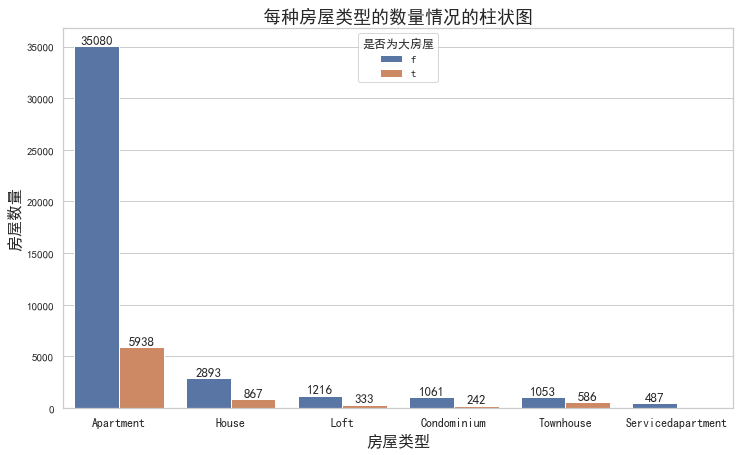

In [385]:
plt.figure(figsize=(12,7))
bar1 = sns.barplot(data=data2,x='房屋类型',y='房屋ID',hue='是否为大房屋')
plt.bar_label(bar1.containers[0])
plt.bar_label(bar1.containers[1])
plt.title('每种房屋类型的数量情况的柱状图',fontsize=18)
plt.xticks(fontsize=12)
plt.xlabel('房屋类型',fontsize=16)
plt.ylabel('房屋数量',fontsize=16)
plt.show()


### 数据透视表

In [407]:
pd.pivot_table(listings_,index=['房间类型','床类型'],values='房屋ID',aggfunc='count').rename(columns={'房屋ID':'房屋数量'}).T

房间类型 Entirehome/apt                                  Privateroom              \
床类型          Airbed Couch Futon Pull-outSofa RealBed      Airbed Couch Futon   
房屋数量             61    19   107          112   26280         131    19   217   

房间类型                      Sharedroom                                   
床类型  Pull-outSofa RealBed     Airbed Couch Futon Pull-outSofa RealBed  
房屋数量          130   22714         28    55    40           70     964

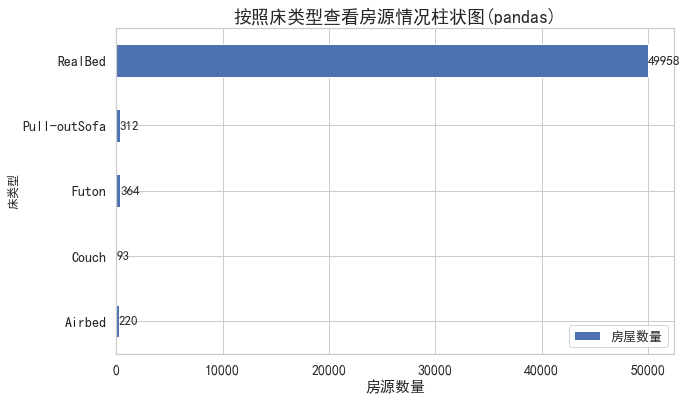

In [439]:
a=listings_.groupby('床类型')[['房屋ID']].count().rename(columns={'房屋ID':'房屋数量'}).plot(kind='barh',
                                                                    figsize=(10,6),fontsize=14)
plt.bar_label(a.containers[0])
plt.legend(loc="lower right",fontsize=13)
plt.title('按照床类型查看房源情况柱状图(pandas)',fontsize=18)
plt.xlabel('房源数量',fontsize=15)
plt.show()

In [403]:
listings_.groupby('房间类型')[['房屋ID']].count()

,房屋ID
房间类型,
Entirehome/apt,26579
Privateroom,23211
Sharedroom,1157


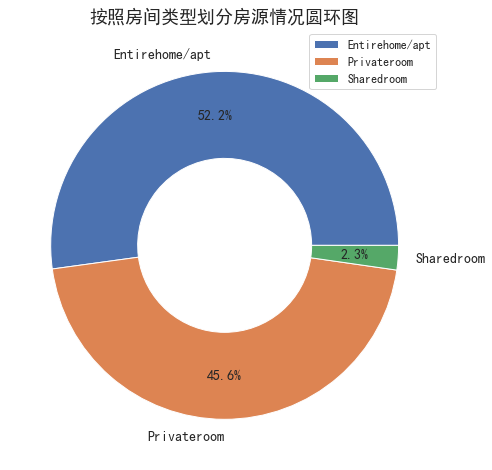

In [440]:
plt.figure(figsize=(10,8))
data = listings_.groupby('房间类型')[['房屋ID']].count()
pie_labels = data.index
plt.pie(data.房屋ID,radius=1,wedgeprops={'width':0.5},labels=pie_labels,
        autopct='%3.1f%%',pctdistance=0.75,textprops={'fontsize':14})
plt.title('按照房间类型划分房源情况圆环图',fontsize=18)
plt.legend(labels=pie_labels,fontsize=12)
plt.show()

,房屋ID
房间类型,
Entirehome/apt,26579
Privateroom,23211
Sharedroom,1157


In [328]:
# data = listings_.groupby(['房间类型','床类型'])[['房屋ID']].count().reset_index()
# plt.figure(figsize=(12,7))
# bar1 = sns.barplot(data=data,x='房间类型',y='房屋ID',hue='床类型')
# plt.bar_label(bar1.containers[0])
# plt.bar_label(bar1.containers[1])
# plt.title('每种房间类型的数量情况的柱状图',fontsize=18)
# plt.xlabel('房间类型',fontsize=16)
# plt.ylabel('房屋数量',fontsize=16)
# plt.show()

#### 3. 求需要保证金和清理费用的房屋数量，同时对保证金和清理费用查看其价格分布区间

In [258]:
print(f'需要保证金的房屋数量为:{np.count_nonzero(listings_.保证金)};\
占比为:{(round(np.count_nonzero(listings_.保证金)/listings_.房屋ID.count(),4))*100}%')

print(f'需要清理费用的房屋数量为:{np.count_nonzero(listings_.清理费用)};\
占比为:{(round(np.count_nonzero(listings_.清理费用)/listings_.房屋ID.count(),4))*100}%')

需要保证金的房屋数量为:21366;占比为:41.94%
需要清理费用的房屋数量为:36734;占比为:72.1%


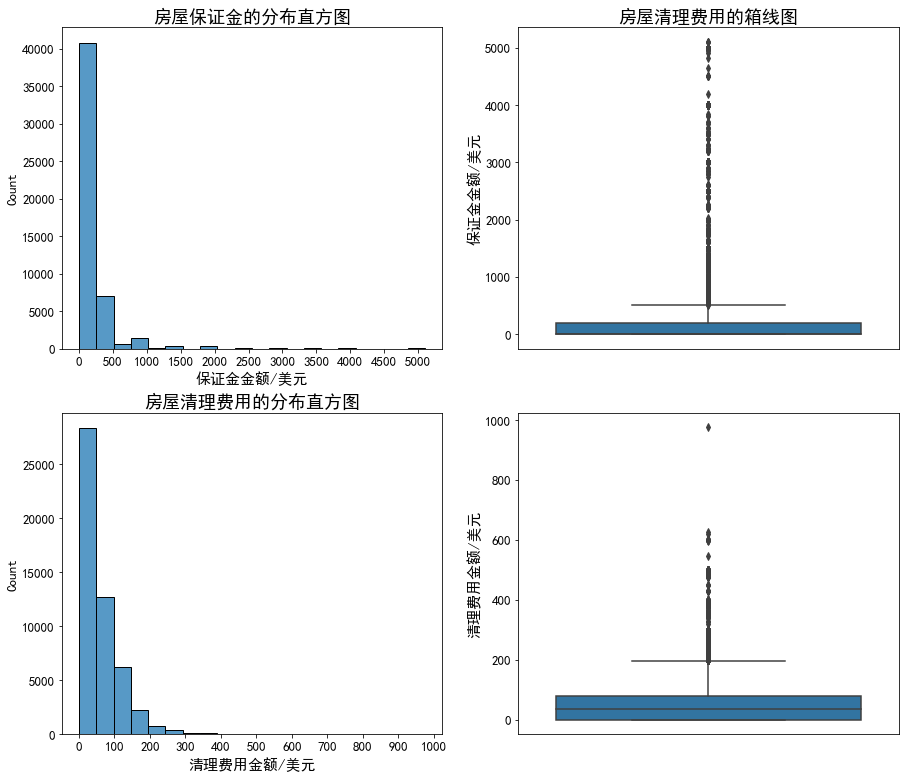

In [75]:
# 保证金和清理费用的分布情况绘图
plt.figure(figsize=(15,13))

ax1 = plt.subplot(2,2,1)
sns.histplot(listings_.保证金,bins=20)
ax1.set_xlabel('保证金金额/美元',fontsize=15)
ax1.set_xticks([x for x in range(0,5500,500)])
ax1.set_title('房屋保证金的分布直方图',fontsize=18)

ax2 = plt.subplot(2,2,2)
sns.boxplot(listings_.保证金)
ax2.set_xticks([1],labels=['保证金'])
ax2.set_ylabel('保证金金额/美元',fontsize=15)
ax2.set_title('房屋保证金的箱线图',fontsize=18)

ax3 = plt.subplot(2,2,3)
sns.histplot(listings_.清理费用,bins=20)
ax3.set_xlabel('清理费用金额/美元',fontsize=15)
ax3.set_xticks([x for x in range(0,1100,100)])
ax3.set_title('房屋清理费用的分布直方图',fontsize=18)

ax4 = plt.subplot(2,2,4)
sns.boxplot(listings_.清理费用)
ax4.set_xticks([1],labels=['清理费用'])
ax4.set_ylabel('清理费用金额/美元',fontsize=15)
ax2.set_title('房屋清理费用的箱线图',fontsize=18)

plt.show()


#### 4. 查看房屋价格的分布情况（seaborn实现）

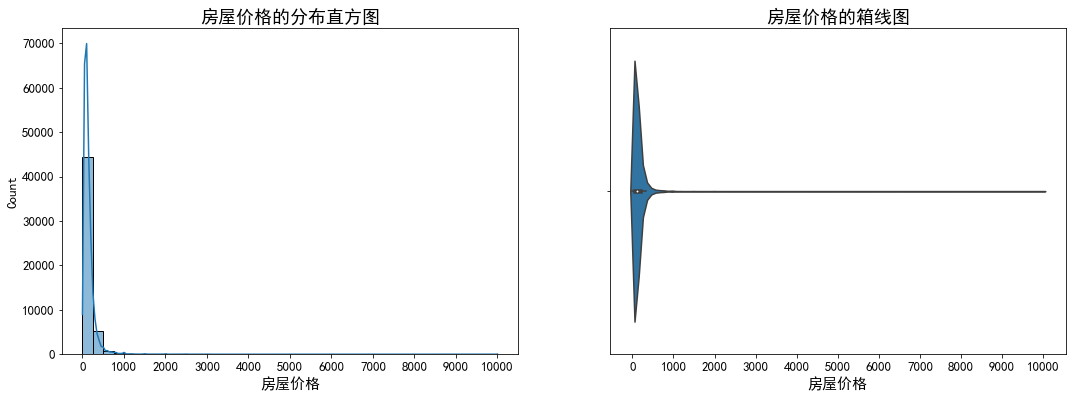

In [78]:
plt.figure(figsize=(18,6))
ax1 = plt.subplot(1,2,1)
ax1 = sns.histplot(data=listings_,x='价格',bins=40,kde=True)
ax1.set_xticks([x for x in range(0,11000,1000)])
ax1.set_xlabel('房屋价格',fontsize=15)
ax1.set_title('房屋价格的分布直方图',fontsize=18)


ax2 = plt.subplot(1,2,2)
sns.violinplot(x=listings_.价格)
ax2.set_xticks([x for x in range(0,11000,1000)])
ax2.set_xlabel('房屋价格',fontsize=15)
ax2.set_title('房屋价格的箱线图',fontsize=18)
plt.show()

#### 5. 按照地区将房屋分组，计算平均价格,绘制地区折线图（pyecharts实现）

In [441]:
data = listings_.groupby('地区')[['价格']].mean()
data = data.reset_index()
data['价格'] = data['价格']

In [442]:
data['价格'] = data['价格'].apply(lambda x:round(x,2))

In [443]:
from pyecharts.charts import Line
line = (Line()
        .add_xaxis(xaxis_data=data['地区'].astype("str").to_list())
        .add_yaxis("房屋平均价格",data['价格'].tolist(),
                   markpoint_opts=opts.MarkPointOpts(
                    data=[opts.MarkPointItem(type_="max", name="最大值"),
                        opts.MarkPointItem(type_="min", name="最小值"),]))
        .set_global_opts(title_opts=opts.TitleOpts(title="各地区房屋平均价格折线图",pos_top="1%"),
                        toolbox_opts = opts.ToolboxOpts(is_show = True),
                        xaxis_opts = opts.AxisOpts(type_='category',name='地区',is_show=True),
                        yaxis_opts = opts.AxisOpts(type_='value',name='房屋平均价格',is_show=True)))
line.load_javascript()

In [444]:
#渲染
line.render_notebook()

In [186]:
#line.render('各个地区房屋平均价格折线图.html')

'C:\\Users\\图南\\Jupyter\\数据可视化\\课程设计\\各个地区房屋平均价格折线图.html'

#### 6. 相关性拟合


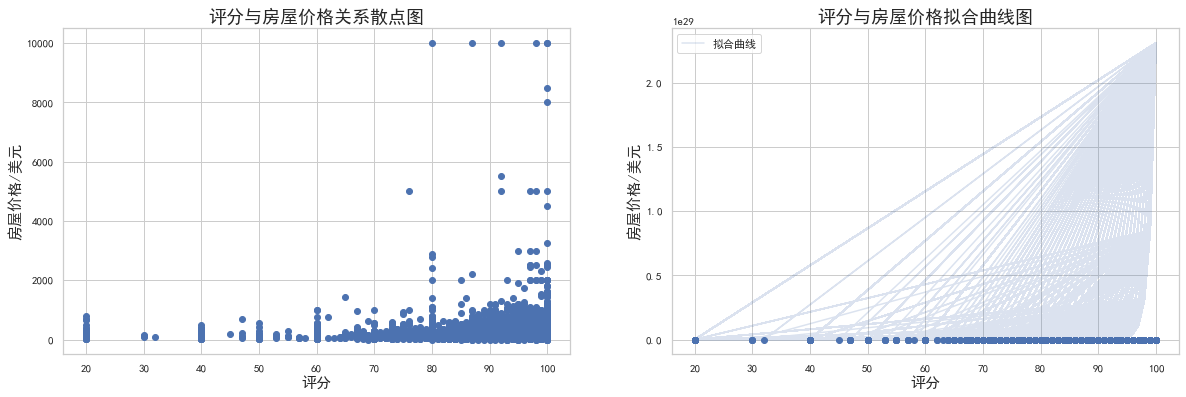

In [329]:
from scipy.optimize import curve_fit
plt.figure(figsize=(20,6))
# 取出评分不为0 的有效数据
data = listings_[listings_.评分!=0][['评分','价格']]
X = data.评分
Y = data.价格
# 散点图
ax1 = plt.subplot(1,2,1)
ax1.scatter(X,Y)
ax1.set_xlabel('评分',fontsize=15)
ax1.set_ylabel('房屋价格/美元',fontsize=15)
ax1.set_title('评分与房屋价格关系散点图',fontsize=18)
# 拟合曲线
ax2 = plt.subplot(1,2,2)
# 定义拟合函数
def func(x, a, b, c):
    return a * np.exp(b * x) + c
# 初始参数值
initial_guess = [1, 1, 1]
# 最小二乘法进行曲线拟合
popt, _ = curve_fit(func, X, Y, initial_guess)
ax2.scatter(X,Y)
ax2.plot(X, func(X, *popt), 'b-',alpha=0.2, label='拟合曲线')
ax2.set_xlabel('评分',fontsize=15)
ax2.set_ylabel('房屋价格/美元',fontsize=15)
ax2.set_title('评分与房屋价格拟合曲线图',fontsize=18)
plt.legend()
plt.show()

### 7.雷达图

In [445]:
listings_.head()

,id,房屋ID,房屋名称,房屋建立时间,是否为大房屋,房屋租赁数量,地址,地区,州,可租总天数/年,房屋类型,房间类型,卧室数量,床类型,价格,保证金,清理费用,评论数量,评分,建房年数
0,15509,59777,Thais,2009-12-03,f,7.0,Bedford-Stuyvesant,Brooklyn,New York,276,Apartment,Privateroom,1,RealBed,59.0,200.0,95.0,14,73.0,11
1,2515,2758,Steph,2008-09-06,t,3.0,Harlem,Manhattan,New York,287,Apartment,Privateroom,1,RealBed,59.0,0.0,60.0,174,93.0,12
2,2539,2787,John,2008-09-07,t,8.0,Kensington,Brooklyn,New York,365,Apartment,Privateroom,1,RealBed,149.0,100.0,25.0,9,98.0,12
3,2595,2845,Jennifer,2008-09-09,f,5.0,Midtown,Manhattan,New York,346,Apartment,Entirehome/apt,0,RealBed,225.0,350.0,100.0,38,95.0,12
4,15729,61531,David,2009-12-09,f,3.0,RedHook,Brooklyn,New York,307,House,Privateroom,1,RealBed,89.0,300.0,60.0,22,79.0,11


In [446]:
# 获取数据
df = listings_.groupby('地区').agg({'价格':'mean','房屋ID':'count','评分':'mean','建房年数':'mean','评论数量':'mean'})
df.rename(columns={'房屋ID':'房屋数量'},inplace=True)
df = df.loc[:,['价格','评分','房屋数量','建房年数','评论数量']].applymap(lambda x:round(x))
df

,价格,评分,房屋数量,建房年数,评论数量
地区,,,,,
Bronx,86,71,1003,4,22
Brooklyn,122,74,20614,6,21
Manhattan,193,70,23481,5,20
Queens,97,75,5515,5,26
StatenIsland,133,77,334,5,27


In [447]:
import pyecharts.options as op
from pyecharts.charts import Radar

data = df.values
x_schema = [
        {"name": "价格",  "color": 'black', "font_size": 20},
        {"name": "评分",  "color": 'black', "font_size": 20},
        {"name": "房屋数量", "color": 'black', "font_size": 20},
        {"name": "建房年数",  "color": 'black', "font_size": 20},
        {"name": "评论数量",  "color": 'black', "font_size": 20}
    ]
radar_x = Radar(init_opts=opts.InitOpts(width="1000px",height='700px'))
radar_x.add_schema(x_schema)
radar_x.add('Bronx', [data[0].tolist()], color='red').set_colors(['red'])
radar_x.add('Brooklyn', [data[1].tolist()], color='green').set_colors(['green'])
radar_x.add('Manhattan', [data[2].tolist()], color='orange').set_colors(['orange'])
radar_x.add('Queens', [data[3].tolist()], color='purple').set_colors(['purple'])
radar_x.add('StatenIsland', [data[4].tolist()], color='blue').set_colors(['blue'])

radar_x.set_global_opts(
        title_opts=op.TitleOpts(title="各地区综合情况雷达图", pos_right="center"),
        toolbox_opts = opts.ToolboxOpts(is_show = True),
        legend_opts=op.LegendOpts(legend_icon="roundRect", align="left", pos_left='7%',
                                  pos_bottom='14%', orient='vertical')
    )
radar_x.load_javascript()

In [448]:
radar_x.render_notebook()

In [199]:
#radar_x.render('各地区综合情况雷达图.html')

'C:\\Users\\图南\\Jupyter\\数据可视化\\课程设计\\各地区综合情况雷达图.html'

### 8.热力图

In [200]:
corr_data = listings_.loc[:,['价格','卧室数量','建房年数','评分','保证金','清理费用','评论数量']].corr()

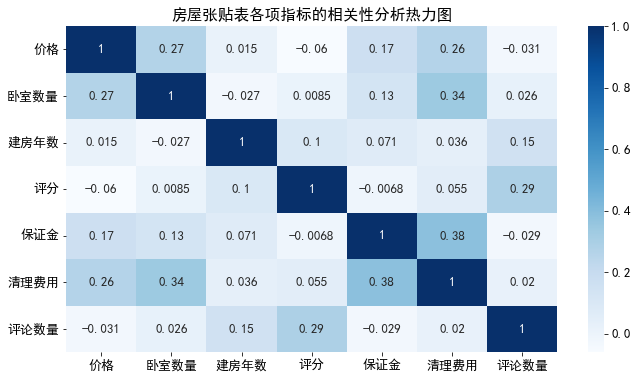

In [203]:
plt.figure(figsize=(11,6))
sns.heatmap(corr_data,annot=True,cmap=plt.cm.Blues)
plt.title('房屋张贴表各项指标的相关性分析热力图')
plt.show()

### reviews(评论表)

### 制作词云图的清晰数据操作，老师您可跳过此步骤，直接划到下面词云图绘制，导入已经清洗好的词频数据集

In [92]:
# # 获取2018年评论数据并进行初步清洗
# df = reviews.loc[['2018' in x for x in reviews.date],:].copy()
# df.dropna(how='any',inplace=True)
# df = df.loc[[x[0].isalpha() for x in df.comments],:]
# df.comments = df.comments.apply(lambda x:x.replace('.','').replace('/','').replace('\n','').
#                                replace(',','').replace('(','').replace(')','').replace('-','').
#                                replace('!',''))
# df.sample(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
366332,21364988,267741008,2018-05-22,44288049,Ella,Staying at Kennedy’s was a pleasure He welcome...
241644,17734371,285001752,2018-07-02,1936664,Mathew,Because I am traveling with my wife 2 little g...
447923,6795657,324664475,2018-09-17,88398869,Sean,Great place
276561,18793633,318216075,2018-09-03,26334457,Oliver,Our stay with Lauren was amazing and exactly w...
193780,16288167,273566222,2018-06-06,173858533,Stefano,Ottima posizione per raggiungere sia l’aeropor...


In [93]:
# # 停用词
# stopwords=["'d", "'ll", "'m", "'re", "'s", "'t", "'ve", "ZT", "ZZ", "a",
#            "a's", "able", "about", "above", "abst", "accordance", "according",
#            "accordingly", "across", "act", "actually", "added", "adj", "adopted", "affected", "affecting", "affects", "after", "afterwards", "again", "against", "ah", "ain't", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "are", "area", "areas", "aren", "aren't", "arent", "arise", "around", "as", "aside", "ask", "asked", "asking", "asks", "associated", "at", "auth", "available", "away", "awfully", "b", "back", "backed", "backing", "backs", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "began", "begin", "beginning", "beginnings", "begins", "behind", "being", "beings", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "big", "biol", "both", "brief", "briefly", "but", "by", "c", "c'mon", "c's", "ca", "came", "can", "can't", "cannot", "cant", "case", "cases", "cause", "causes", "certain", "certainly", "changes", "clear", "clearly", "co", "com", "come", "comes", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn't", "couldnt", "course", "currently", "d", "date", "definitely", "describe", "described", "despite", "did", "didn't", "differ", "different", "differently", "discuss", "do", "does", "doesn't", "doing", "don't", "done", "down", "downed", "downing", "downs", "downwards", "due", "during", "e", "each", "early", "ed", "edu", "effect", "eg", "eight", "eighty", "either", "else", "elsewhere", "end", "ended", "ending", "ends", "enough", "entirely", "especially", "et", "et-al", "etc", "even", "evenly", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "f", "face", "faces", "fact", "facts", "far", "felt", "few", "ff", "fifth", "find", "finds", "first", "five", "fix", "followed", "following", "follows", "for", "former", "formerly", "forth", "found", "four", "from", "full", "fully", "further", "furthered", "furthering", "furthermore", "furthers", "g", "gave", "general", "generally", "get", "gets", "getting", "give", "given", "gives", "giving", "go", "goes", "going", "gone", "good", "goods", "got", "gotten", "great", "greater", "greatest", "greetings", "group", "grouped", "grouping", "groups", "h", "had", "hadn't", "happens", "hardly", "has", "hasn't", "have", "haven't", "having", "he", "he's", "hed", "hello", "help", "hence", "her", "here", "here's", "hereafter", "hereby", "herein", "heres", "hereupon", "hers", "herself", "hes", "hi", "hid", "high", "higher", "highest", "him", "himself", "his", "hither", "home", "hopefully", "how", "howbeit", "however", "hundred", "i", "i'd", "i'll", "i'm", "i've", "id", "ie", "if", "ignored", "im", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "include", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "interested", "interesting", "interests", "into", "invention", "inward", "is", "isn't", "it", "it'd", "it'll", "it's", "itd", "its", "itself", "j", "just", "k", "keep", "keeps", "kept", "keys", "kg", "kind", "km", "knew", "know", "known", "knows", "l", "large", "largely", "last", "lately", "later", "latest", "latter", "latterly", "least", "less", "lest", "let", "let's", "lets", "like", "liked", "likely", "line", "little", "long", "longer", "longest", "look", "looking", "looks", "ltd", "m", "made", "mainly", "make", "makes", "making", "man", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "member", "members", "men", "merely", "mg", "might", "million", "miss", "ml", "more", "moreover", "most", "mostly", "mr", "mrs", "much", "mug", "must", "my", "myself", "n", "n't", "na", "name", "namely", "nay", "nd", "near", "nearly", "necessarily", "necessary", "need", "needed", "needing", "needs", "neither", "never", "nevertheless", "new", "newer", "newest", "next", "nine", "ninety", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "number", "numbers", "o", "obtain", "obtained", "obviously", "of", "off", "often", "oh", "ok", "okay", "old", "older", "oldest", "omitted", "on", "once", "one", "ones", "only", "onto", "open", "opened", "opening", "opens", "or", "ord", "order", "ordered", "ordering", "orders", "other", "others", "otherwise", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "owing", "own", "p", "page", "pages", "part", "parted", "particular", "particularly", "parting", "parts", "past", "per", "perhaps", "place", "placed", "places", "please", "plus", "point", "pointed", "pointing", "points", "poorly", "possible", "possibly", "potentially", "pp", "predominantly", "present", "presented", "presenting", "presents", "presumably", "previously", "primarily", "probably", "problem", "problems", "promptly", "proud", "provides", "put", "puts", "q", "que", "quickly", "quite", "qv", "r", "ran", "rather", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "respectively", "resulted", "resulting", "results", "right", "room", "rooms", "run", "s", "said", "same", "saw", "say", "saying", "says", "sec", "second", "secondly", "seconds", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "sees", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "shall", "she", "she'll", "shed", "shes", "should", "shouldn't", "show", "showed", "showing", "shown", "showns", "shows", "side", "sides", "significant", "significantly", "similar", "similarly", "since", "six", "slightly", "small", "smaller", "smallest", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "specifically", "specified", "specify", "specifying", "state", "states", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "t", "t's", "take", "taken", "taking", "tell", "tends", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "that's", "that've", "thats", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "there'll", "there's", "there've", "thereafter", "thereby", "thered", "therefore", "therein", "thereof", "therere", "theres", "thereto", "thereupon", "these", "they", "they'd", "they'll", "they're", "they've", "theyd", "theyre", "thing", "things", "think", "thinks", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thought", "thoughts", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "til", "tip", "to", "today", "together", "too", "took", "toward", "towards", "tried", "tries", "truly", "try", "trying", "ts", "turn", "turned", "turning", "turns", "twice", "two", "u", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "up", "upon", "ups", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "uucp", "v", "value", "various", "very", "via", "viz", "vol", "vols", "vs", "w", "want", "wanted", "wanting", "wants", "was", "wasn't", "way", "ways", "we", "we'd", "we'll", "we're", "we've", "wed", "welcome", "well", "wells", "went", "were", "weren't", "what", "what'll", "what's", "whatever", "whats", "when", "whence", "whenever", "where", "where's", "whereafter", "whereas", "whereby", "wherein", "wheres", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "who'll", "who's", "whod", "whoever", "whole", "whom", "whomever", "whos", "whose", "why", "widely", "will", "willing", "wish", "with", "within", "without", "won't", "wonder", "words", "work", "worked", "working", "works", "world", "would", "wouldn't", "www", "x", "y", "year", "years", "yes", "yet", "you", "you'd", "you'll", "you're", "you've", "youd", "young", "younger", "youngest", "your", "youre", "yours", "yourself", "yourselves", "z", "zero", "zt", "zz"]

In [94]:
# # 对评论的分词函数
# def word_split(comment):
#     lt = comment.split(' ')
#     bool_ = [word in stopwords for word in lt]
#     words = []
#     for i in range(len(lt)):
#         if bool_[i]==False:
#             words.append(lt[i])
#     return words           

In [95]:
# # 应用上述分词函数对'comments'列进行切分，并且将结果存入新的'words'列中
# df['words'] = df.comments.apply(word_split)

In [96]:
# # 获取df.words数据列表
# words_lt = df.words.to_list()

In [97]:
# # 对于每一条评论分词后的列表进行取词操作，存入word_lt列表
# word_lt = []
# for temp in words_lt:
#     for i in range(len(temp)):
#         word_lt.append(temp[i]) 

In [ ]:
# # 计算词频（运行时间特别长，已经将结果写入csv文件）
# words_set = set(word_lt)
# word_freq = {}
# for w in words_set:
#     word_freq[w] = word_lt.count(w)

In [228]:
# k_lt=[]
# v_lt=[]
# for k,v in word_freq.items():
#     k_lt.append(k)
#     v_lt.append(v)

In [230]:
# # 排序前的词频数据
# word_freq_df = pd.DataFrame(columns=['word','freq'])
# word_freq_df.word = k_lt
# word_freq_df.freq = v_lt

In [232]:
# word_freq_df.to_csv('word_freq_df.csv',index=False)

In [122]:
#word_freq = pd.read_csv('word_freq_df.csv')

In [123]:
#word_freq = word_freq.set_index('word').to_dict()

In [124]:
# for i ,z in word_freq.items():
#     word_freq = z

In [114]:
# # 对词频数据降序排序并且存入到 word_freq_sorted
# word_freq_sorted = dict(sorted(word_freq.items(),key=lambda kv:kv[1],reverse=True))

In [ ]:
# # 继续清洗词频数据
# word_freq_after = {} 
# for x,y in word_freq.items():
#     x=x.lower()
#     if x == '' or x.isdigit():
#         continue
#     if x not in stopwords:
#         word_freq_after[x]=y

In [120]:
# # 按词频降序输出
# word_freq_sorted = dict(sorted(word_freq.items(),key=lambda kv:kv[1],reverse=True))
# #print(word_freq_sorted)

In [236]:
# k_lt=[]
# v_lt=[]
# for k,v in word_freq_sorted.items():
#     k_lt.append(k)
#     v_lt.append(v)

In [237]:
# # 排序后的词频数据
# word_freq_sorted_df = pd.DataFrame(columns=['word','freq'])
# word_freq_sorted_df.word = k_lt
# word_freq_sorted_df.freq = v_lt

In [239]:
# word_freq_sorted_df.to_csv('word_freq_sorted.csv',index=False)

### 词云图绘制

In [127]:
# 读入清洗整理好的2018年的评论数据
word_freq_sorted_df = pd.read_csv('word_freq_sorted.csv',index_col=0)
word_freq_sorted_df.head()

,freq
word,
comfortable,56015
space,42044
restaurants,33544
nyc,33251
neighborhood,31032


In [129]:
word_freq_sorted_dict = word_freq_sorted_df.to_dict()
word_freq_sorted_dict = word_freq_sorted_dict['freq']

In [133]:
print('Airbnb网站2018年评论分词词频数据字典长度:',len(word_freq_sorted_dict))

Airbnb网站2018年评论分词词频数据字典长度: 125688


In [134]:
#载入词云软件包
from os import path
import imageio
import matplotlib.pyplot as plt
from wordcloud import WordCloud,ImageColorGenerator

In [135]:
#词云函数
wc = WordCloud(
    font_path='/Windows/Fonts/STKAITI.TTF',
    background_color="white",width=1000,
    height=600,max_words=10000,
    max_font_size=250,random_state=42)

In [136]:
#导入词频字典格式
wc.generate_from_frequencies(word_freq_sorted_dict)

In [137]:
#绘制
wc.to_file("2018年Airbnb客户评论词云图.png")

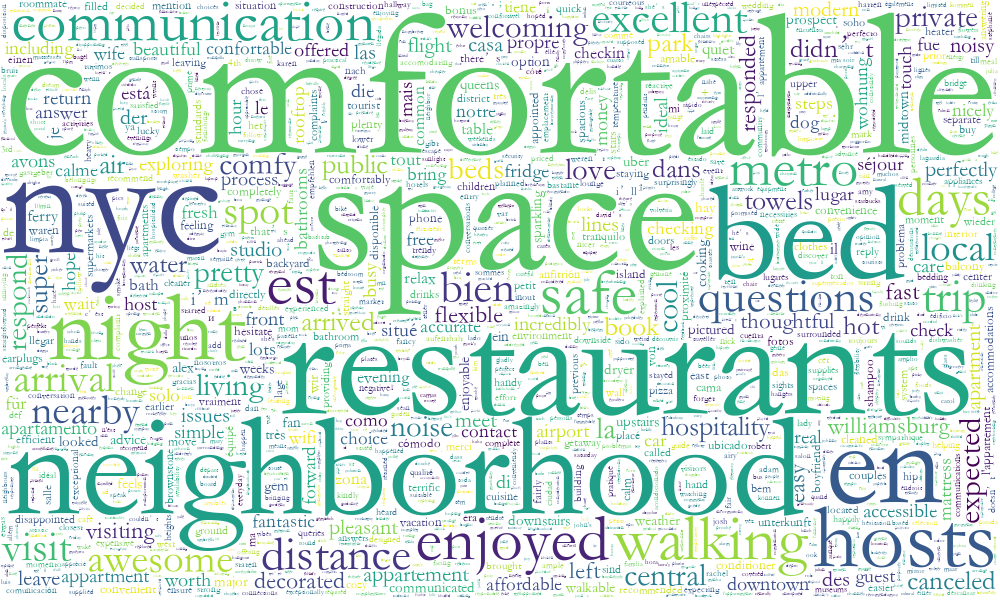

In [138]:
# 展示词云图
from PIL import Image
Image.open('2018年Airbnb客户评论词云图.png')

### calendar(预约表)

In [139]:
# 展示清理后的calendar数据集的随机5条记录
calendar_df.sample(5)

,listing_id,date,available,price,year,month
14009744,2116059,2016-12-22,t,100.0,2016,12
50564963,14195493,2019-08-12,t,149.0,2019,8
35723972,14672067,2017-12-08,t,85.0,2017,12
50392714,13963005,2019-01-16,t,176.0,2019,1
12128343,1956677,2017-07-01,t,150.0,2017,7


In [335]:
price_mean = calendar_df.groupby(['year','month'])[['price']].mean()
price_mean.head()

price
year month            
2015 11     161.928154
     12     168.427944
2016 1      158.129200
     2      157.709497
     3      159.341177

In [144]:
# 由于2015年数据只有11月和12月的，故删除
price_mean = price_mean.drop(2015)

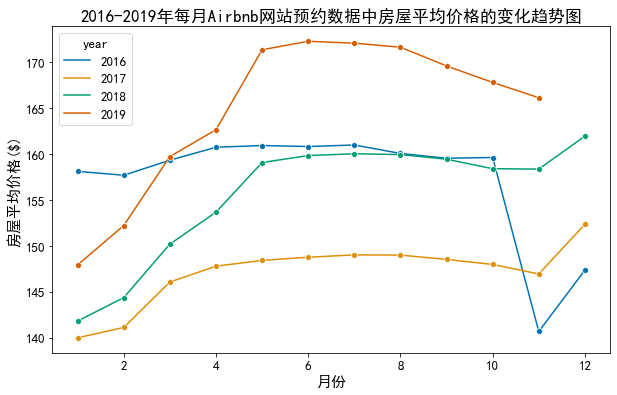

In [167]:
plt.figure(figsize=(10,6))
sns.lineplot(data=price_mean,x='month',hue='year',y='price',marker='o',palette='colorblind')
plt.ylabel("房屋平均价格($)",fontsize=15)
plt.xlabel('月份',fontsize=15)
plt.title("2016-2019年每月Airbnb网站预约数据中房屋平均价格的变化趋势图",fontsize=17)
plt.show()